In [1]:
from utils import *

In [2]:
years = [2016,2017]
n_years = len(years)
resampling_period = '1h'

original_data = load_resample_data(years, resampling_period)
windfarms_names = original_data.columns.tolist() 
# original_data.head(3)

year:2016	(105408, 20)
year:2017	(105120, 20)
resampled to  (17544, 20)


In [3]:
Total_wind = pd.DataFrame(original_data.sum(axis=1))
Total_wind.columns=['Total_wind']
Total_wind.head(3)

,Total_wind
DT,
2016-01-01 00:00:00,958.10
2016-01-01 01:00:00,952.08
2016-01-01 02:00:00,913.41


In [4]:
def load_resample_load_data(years, resampling_period = '60T'):
    raw_data = []
    for year in (years):
        raw_data_year = pd.read_csv('NRGstreamData\Load_data\Load225_'+ str(year) 
                               + '-01-01_'+ str(year) + '-12-31_5.csv', header= None, parse_dates=[0])
        raw_data.append(raw_data_year)
        print('year:'+ str(year) + '\t' + str(raw_data_year.shape))
    raw_data = pd.concat(raw_data)
    
    raw_data.columns = ['DT','Load']
    raw_data.set_index('DT',inplace=True)

    # Resmaple data
    data = raw_data.resample(resampling_period).mean()
    print('resampled to ',str(data.shape))   
    
    #### Convert data to Intetger  OR  round data 
    pd.options.display.float_format = '{:.2f}'.format
    data = data.round(decimals=2)
    # data = data.astype(int)
    
    return data

load_data = load_resample_load_data(years, resampling_period = '60T')
load_data.head(3)

year:2016	(105408, 2)
year:2017	(105120, 2)
resampled to  (17544, 1)


,Load
DT,
2016-01-01 00:00:00,9196.92
2016-01-01 01:00:00,9051.33
2016-01-01 02:00:00,8879.25


In [6]:
def load_resample_price_data(years, resampling_period = '60T'):
    raw_data = []
    for year in (years):
        raw_data_year = pd.read_csv('NRGstreamData\Price_data\Price_'+ str(year) 
                               + '-01-01_'+ str(year) + '-12-31_60.csv', header= None, parse_dates=[0])
        raw_data.append(raw_data_year)
        print('year:'+ str(year) + '\t' + str(raw_data_year.shape))
    raw_data = pd.concat(raw_data)
    
    raw_data.columns = ['DT','Price']
    raw_data.set_index('DT',inplace=True)

    # Resmaple data
    data = raw_data.resample(resampling_period).mean()
    print('resampled to ',str(data.shape))   
    
    #### Convert data to Intetger  OR  round data 
    pd.options.display.float_format = '{:.2f}'.format
    data = data.round(decimals=2)
    # data = data.astype(int)
    
    return data

price_data = load_resample_price_data(years, resampling_period = '60T')
# price_data.head(4)

year:2016	(8784, 2)
year:2017	(8760, 2)
resampled to  (17544, 1)


In [7]:
WLP_data = pd.concat([Total_wind,load_data,price_data],axis=1)

In [8]:
WLP_data['wind/Load'] =  WLP_data['Total_wind'] / WLP_data['Load'] * 100

WLP_data['date'] = WLP_data.index.date
WLP_data['season'] =((WLP_data.index.month)//3) % 4

WLP_data = WLP_data.round(decimals=1)
pd.options.display.float_format = '{:.1f}'.format

WLP_data.tail()

,Total_wind,Load,Price,wind/Load,date,season
DT,,,,,,
2017-12-31 19:00:00,263.8,10962.9,33.7,2.4,2017-12-31,0
2017-12-31 20:00:00,237.2,10801.2,40.5,2.2,2017-12-31,0
2017-12-31 21:00:00,228.6,10725.7,39.7,2.1,2017-12-31,0
2017-12-31 22:00:00,210.1,10579.3,49.6,2.0,2017-12-31,0
2017-12-31 23:00:00,197.4,10390.2,43.8,1.9,2017-12-31,0


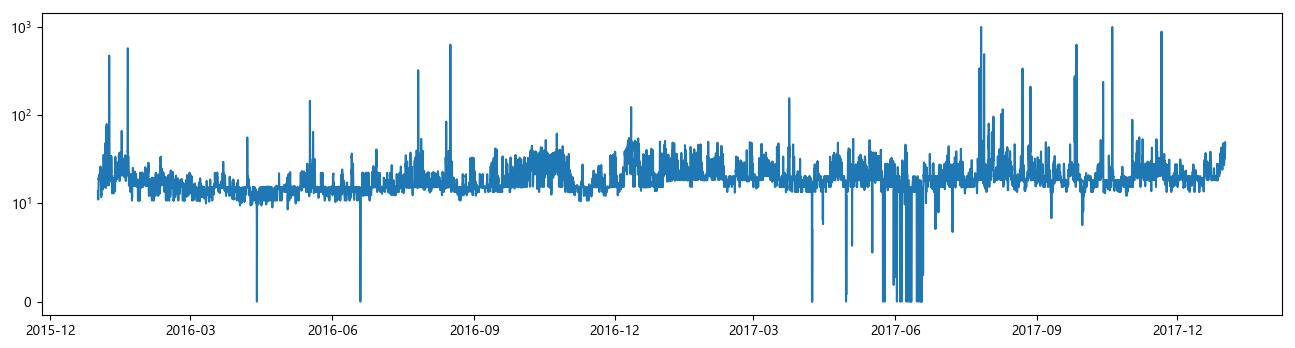

In [10]:
fig, ax = plt.subplots(figsize=(16,4),dpi=100)
plt.plot(WLP_data['Price'])
plt.yscale('symlog', linthreshy=10)

In [11]:
# remove noise data
WLP_data_filtered = WLP_data[(WLP_data['Price'] < 100) & ((WLP_data['Price'] > 0)) & (WLP_data['wind/Load'] < 15)]

avg_price_wind_shares = WLP_data_filtered.groupby('wind/Load')['Price'].mean()

In [55]:
np.corrcoef(WLP_data_filtered['Total_wind'],WLP_data_filtered['Load'])[0][1]
# np.corrcoef(WLP_data_filtered['wind/Load'],WLP_data_filtered['Price'])[0][1]

0.021489166082592142

In [56]:
WLP_data_filtered['Load']

DT
2016-01-01 00:00:00    9196.9
2016-01-01 01:00:00    9051.3
2016-01-01 02:00:00    8879.2
2016-01-01 03:00:00    8781.7
2016-01-01 04:00:00    8738.3
2016-01-01 05:00:00    8699.8
2016-01-01 06:00:00    8770.8
2016-01-01 07:00:00    8918.2
2016-01-01 08:00:00    9003.0
2016-01-01 09:00:00    9065.2
2016-01-01 10:00:00    9190.5
2016-01-01 11:00:00    9263.5
2016-01-01 12:00:00    9323.5
2016-01-01 13:00:00    9257.9
2016-01-01 14:00:00    9213.8
2016-01-01 15:00:00    9301.7
2016-01-01 16:00:00    9571.2
2016-01-01 17:00:00    9999.4
2016-01-01 18:00:00    9939.6
2016-01-01 19:00:00    9821.8
2016-01-01 20:00:00    9677.6
2016-01-01 21:00:00    9542.8
2016-01-01 22:00:00    9362.3
2016-01-01 23:00:00    9114.2
2016-01-02 00:00:00    8920.2
2016-01-02 01:00:00    8758.9
2016-01-02 02:00:00    8628.8
2016-01-02 03:00:00    8626.2
2016-01-02 04:00:00    8692.4
2016-01-02 05:00:00    8780.7
                        ...  
2017-12-30 18:00:00   11223.9
2017-12-30 19:00:00   11158.6
2017-12

Text(0,0.5,'Price')

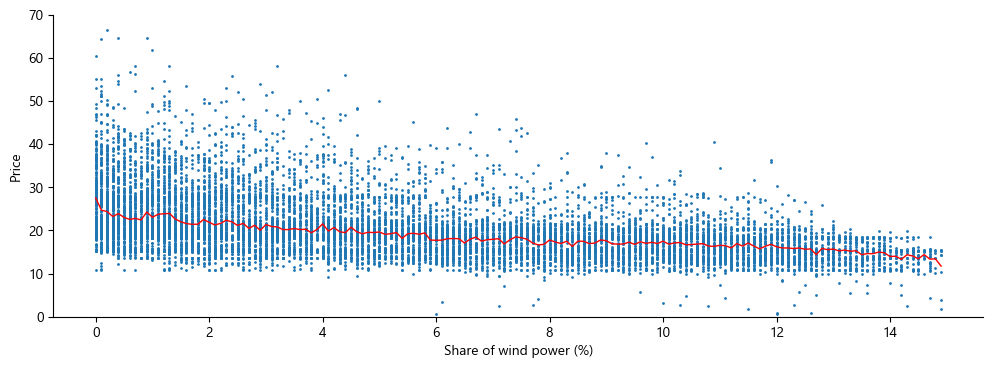

In [42]:
fig, ax = plt.subplots(figsize=(12,4),dpi=100)
plt.scatter(WLP_data_filtered['wind/Load'],WLP_data_filtered['Price'], s = 1)
plt.plot(avg_price_wind_shares, 'r', lw = 1)
ax.set_ylim(0,70)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Share of wind power (%)',fontsize=10)
ax.set_ylabel('Price',fontsize=10)

# fig.tight_layout()
# plt.savefig('price_of_different_wind_shares.jpg', bbox_inches='tight', dpi = 300)
# plt.savefig('price_of_different_wind_shares_without_trend.jpg', bbox_inches='tight', dpi = 300)

C:\Users\mabag\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


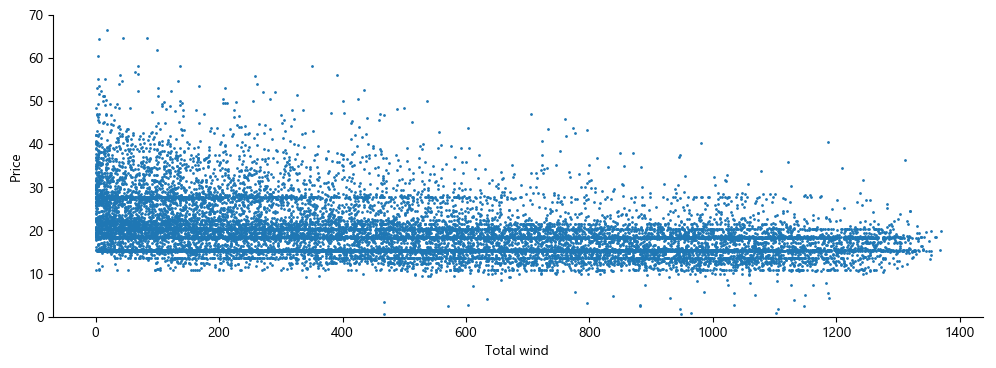

In [54]:
fig, ax = plt.subplots(figsize=(12,4),dpi=100)
WLP_data_filtered['Total_wind2'] = (WLP_data_filtered['Total_wind']).round(decimals=0)
plt.scatter(WLP_data_filtered['Total_wind2'],WLP_data_filtered['Price'], s = 1)
# plt.plot(avg_price_wind_shares, 'r', lw = 1)
ax.set_ylim(0,70)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Total wind ',fontsize=10)
ax.set_ylabel('Price',fontsize=10)

# fig.tight_layout()
plt.savefig('price_of_different_wind.jpg', bbox_inches='tight', dpi = 300)
# plt.savefig('price_of_different_wind_shares_without_trend.jpg', bbox_inches='tight', dpi = 300)

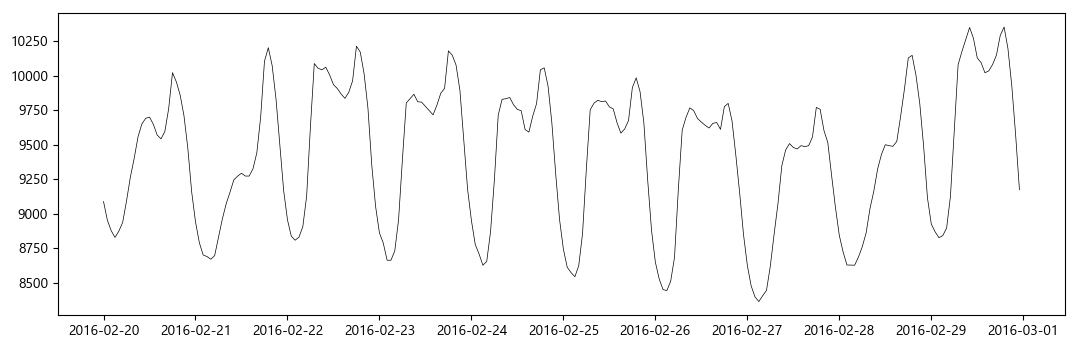

In [15]:
fig, ax = plt.subplots(figsize=(13,4),dpi=100)
x=50*24
plt.plot(WLP_data['Load'][x:x+24*10], 'k', lw = 0.5)

In [16]:
a = (WLP_data.groupby('date')['Load'].idxmax())
WLP_data_peak = WLP_data.loc[a]
WLP_data_peak.head()

,Total_wind,Load,Price,wind/Load,date,season
DT,,,,,,
2016-01-01 17:00:00,523.9,9999.4,21.2,5.2,2016-01-01,0
2016-01-02 17:00:00,150.7,10275.4,26.2,1.5,2016-01-02,0
2016-01-03 17:00:00,858.7,10529.8,23.5,8.2,2016-01-03,0
2016-01-04 17:00:00,260.0,10792.7,35.6,2.4,2016-01-04,0
2016-01-05 17:00:00,224.0,10903.0,48.0,2.1,2016-01-05,0


In [17]:
WLP_each_hour_seasonal = WLP_data.groupby([WLP_data.index.hour,'season']).mean().unstack()

hours_name = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', 
              '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
WLP_each_hour_seasonal.index = hours_name

WLP_each_hour_seasonal.head()

Total_wind                     Load                      Price       \
season          0     1     2     3      0      1      2      3     0    1   
12am        611.2 551.1 450.6 588.8 9335.9 8241.9 8350.7 8575.8  18.5 15.2   
1am         614.2 555.5 430.3 581.4 9205.6 8108.9 8166.7 8450.9  17.9 14.3   
2am         607.9 539.9 409.7 569.8 9132.9 8037.6 8054.0 8377.2  17.5 14.1   
3am         610.0 530.3 391.2 563.4 9113.0 8015.5 8002.5 8354.5  17.3 14.1   
4am         599.6 526.8 375.7 551.7 9150.4 8050.7 8005.6 8394.6  17.6 14.2   

                 wind/Load              
season    2    3         0   1   2   3  
12am   15.8 17.6       6.6 6.7 5.4 6.9  
1am    15.1 17.0       6.8 6.9 5.3 6.9  
2am    14.5 16.8       6.8 6.7 5.1 6.8  
3am    14.3 16.6       6.8 6.6 4.9 6.7  
4am    14.2 16.7       6.7 6.5 4.7 6.6

In [18]:
colors = [(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0)]

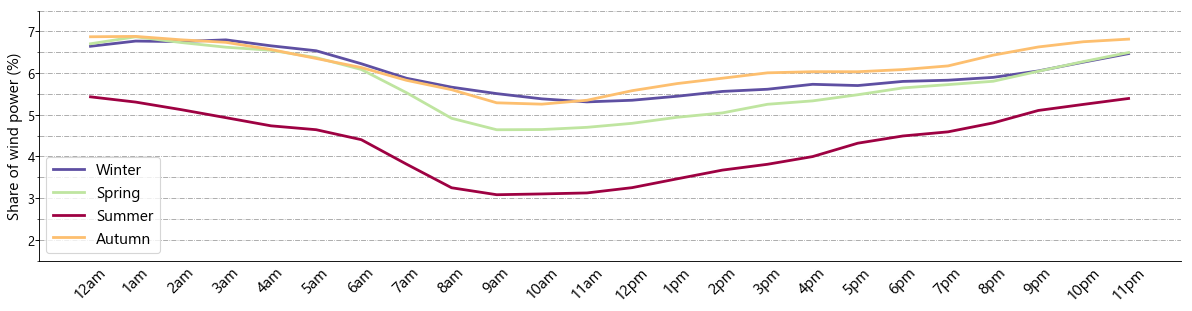

In [19]:
data_here = WLP_each_hour_seasonal['wind/Load']

fig,ax = plt.subplots(dpi=80)
data_here.plot(kind='line',figsize=(15,4),legend=False,color =colors, ax = ax,lw=2.5) #yerr=cf_hourly_avg_var.values

ax.tick_params(axis='x', labelsize = 14, which='both', pad=0, rotation=45 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='both', pad=0, rotation=0  , color = 'k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(1.5,8,0.5),minor=True)
ax.set_xticks(np.arange(0,len(data_here.index))) #minor=True
ax.set_xticklabels(data_here.index)

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_axisbelow(True)
ax.grid(color='k', linestyle='-.', linewidth=0.7, alpha = 0.4, which = 'minor')

ax.legend(["Winter", "Spring","Summer","Autumn"], fontsize=14, facecolor = 'w')

ax.set_ylabel('Share of wind power (%)',fontsize=14)

fig.tight_layout()
plt.savefig('Avg_share_of_wind_power_each_hour_seasonal.jpg', bbox_inches='tight', dpi = 300)

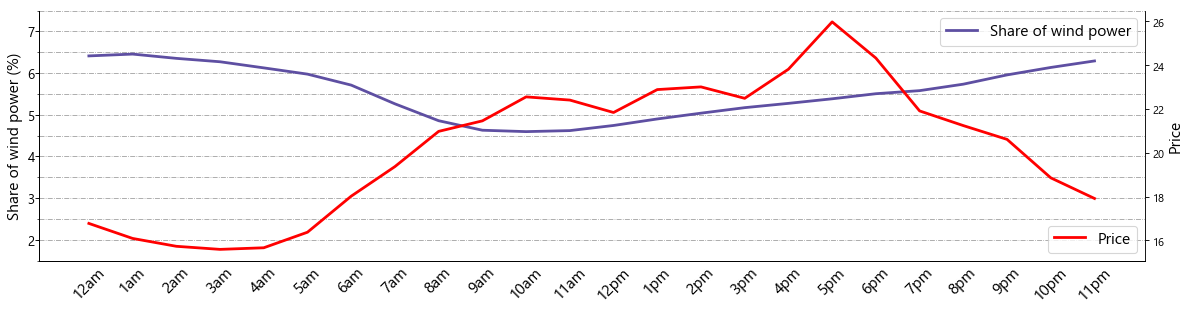

In [71]:
data_here1 = WLP_each_hour_seasonal['wind/Load'].mean(axis=1)
data_here2 = WLP_each_hour_seasonal['Price'].mean(axis=1)

fig, ax = plt.subplots(dpi=80)

data_here1.plot(kind='line',figsize=(15,4),legend=False,color =colors, ax = ax,lw=2.5) #yerr=cf_hourly_avg_var.values

ax.tick_params(axis='x', labelsize = 14, which='both', pad=0, rotation=45 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='both', pad=0, rotation=0  , color = 'k')

ax.set_yticks(np.arange(1.5,8,0.5),minor=True)
ax.set_xticks(np.arange(0,len(data_here.index))) #minor=True
ax.set_xticklabels(data_here.index)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Share of wind power (%)',fontsize=14)
ax.legend(["Share of wind power"], fontsize=14, facecolor = 'w')

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_axisbelow(True)
ax.grid(color='k', linestyle='-.', linewidth=0.7, alpha = 0.4, which = 'minor')

# ------------------------------------------------------------------------------------------------------------------
ax2 = ax.twinx()
data_here2.plot(kind='line',figsize=(15,4),legend=False, color ='r', ax = ax2,lw=2.5) #yerr=cf_hourly_avg_var.values

ax2.legend(["Price"], fontsize=14, facecolor = 'w',loc='lower right')
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.savefig('Avg_share_of_wind_power_each_vs_price.jpg', bbox_inches='tight', dpi = 300)

In [63]:
WLP_each_hour = WLP_data.groupby([WLP_data.index.hour]).mean()
WLP_each_hour.head()

,Total_wind,Load,Price,wind/Load,season,Total_wind2
DT,,,,,,
0,550.1,8623.3,16.8,6.4,1.5,55.0
1,545.0,8480.1,16.1,6.5,1.5,54.5
2,531.4,8397.5,15.7,6.3,1.5,53.2
3,523.3,8368.4,15.6,6.3,1.5,52.4
4,513.0,8397.3,15.6,6.1,1.5,51.3


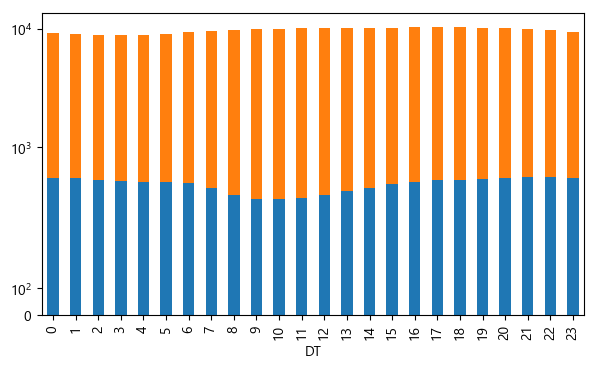

In [64]:
fig, ax = plt.subplots(figsize=(7,4),dpi=100)
WLP_each_hour[['Total_wind','Load']].plot.bar(stacked=True,ax=ax, legend=False)
plt.yscale('symlog', linthreshy=500)

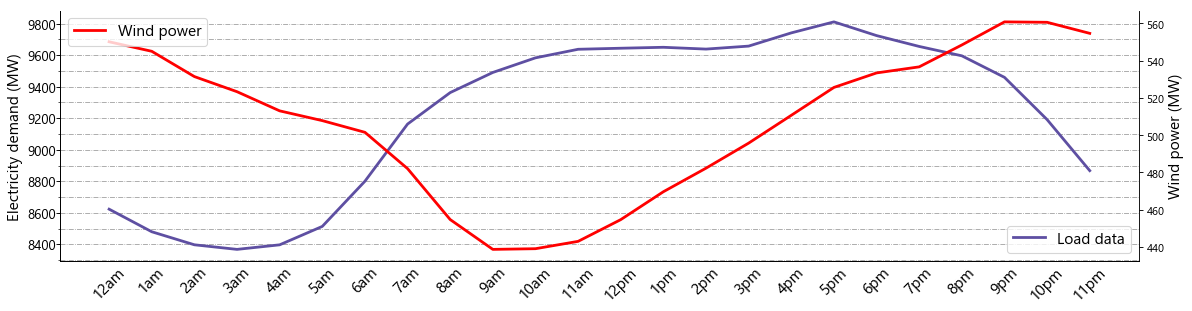

In [81]:
data_here1 = WLP_each_hour['Load']#.mean(axis=1)
data_here2 = WLP_each_hour['Total_wind']#.mean(axis=1)

fig, ax = plt.subplots(dpi=80)

data_here1.plot(kind='line',figsize=(15,4),legend=False,color =colors, ax = ax,lw=2.5) #yerr=cf_hourly_avg_var.values

ax.tick_params(axis='x', labelsize = 14, which='both', pad=0, rotation=45 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='both', pad=0, rotation=0  , color = 'k')

ax.set_yticks(np.arange(8300,9900,100),minor=True)
ax.set_xticks(np.arange(0,len(data_here.index))) #minor=True
ax.set_xticklabels(data_here.index)
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Electricity demand (MW)',fontsize=14)
ax.legend(["Load data"], fontsize=14, facecolor = 'w', loc=4)

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_axisbelow(True)
ax.grid(color='k', linestyle='-.', linewidth=0.7, alpha = 0.4, which = 'minor')

# ------------------------------------------------------------------------------------------------------------------
ax2 = ax.twinx()
data_here2.plot(kind='line',figsize=(15,4),legend=False, color ='r', ax = ax2,lw=2.5) #yerr=cf_hourly_avg_var.values

ax2.legend(["Wind power"], fontsize=14, facecolor = 'w',loc='upper left')
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('Wind power (MW)',fontsize=14)

fig.tight_layout()
plt.savefig('Load_vs_wind.jpg', bbox_inches='tight', dpi = 300)

In [91]:
WLP_each_season = WLP_data.groupby([WLP_data.season]).mean()
WLP_each_season['Total_wind_10'] = WLP_each_season['Total_wind'] * 10
WLP_each_season.head()

,Total_wind,Load,Price,wind/Load,Total_wind2,Total_wind_10
season,,,,,,
0,586.7,9958.8,22.0,6.0,58.7,5867.2
1,499.7,8784.6,17.7,5.7,50.0,4996.9
2,376.7,8953.4,20.0,4.3,37.7,3767.1
3,565.8,9223.2,21.2,6.2,56.6,5658.4


In [93]:
np.corrcoef(WLP_each_season['Total_wind_10'],WLP_each_season['Load'])[0][1]

0.6593306505506522

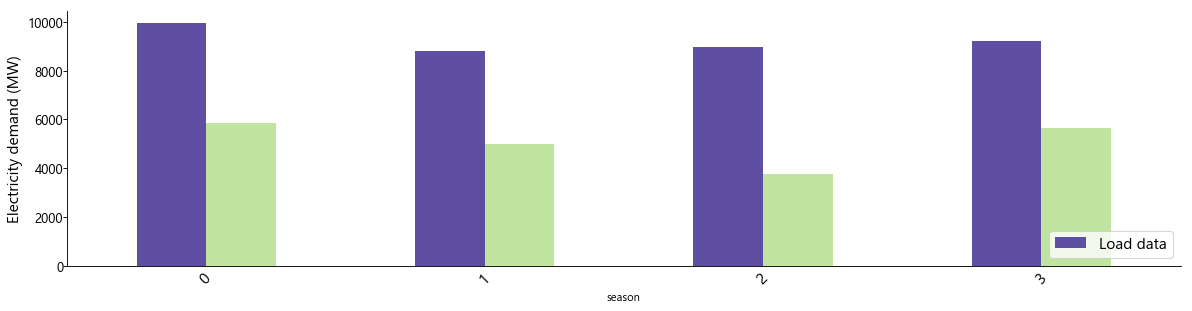

In [92]:
data_here1 = WLP_each_season[['Load','Total_wind_10']]#.mean(axis=1)
# data_here2 = WLP_each_season['Total_wind']#.mean(axis=1)

fig, ax = plt.subplots(dpi=80)

data_here1.plot(kind='bar',figsize=(15,4),legend=False,color =colors, ax = ax,lw=2.5) #yerr=cf_hourly_avg_var.values

ax.tick_params(axis='x', labelsize = 14, which='both', pad=0, rotation=45 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='both', pad=0, rotation=0  , color = 'k')

# ax.set_yticks(np.arange(8300,9900,100),minor=True)
# ax.set_xticks(np.arange(0,len(data_here.index))) #minor=True
# ax.set_xticklabels(data_here.index)
# ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Electricity demand (MW)',fontsize=14)
ax.legend(["Load data"], fontsize=14, facecolor = 'w', loc=4)

ax.set_xmargin(0)
ax.set_ymargin(0)
ax.set_axisbelow(True)
ax.grid(color='k', linestyle='-.', linewidth=0.7, alpha = 0.4, which = 'minor')

# ------------------------------------------------------------------------------------------------------------------
# ax2 = ax.twinx()
# data_here2.plot(kind='bar',figsize=(15,4),legend=False, color ='r', ax = ax2,lw=2.5) #yerr=cf_hourly_avg_var.values

# ax2.legend(["Wind power"], fontsize=14, facecolor = 'w',loc='upper left')
# ax2.spines['top'].set_visible(False)

# ax2.set_ylabel('Wind power (MW)',fontsize=14)

fig.tight_layout()
# plt.savefig('Load_vs_wind_seasonal.jpg', bbox_inches='tight', dpi = 300)